<a href="https://colab.research.google.com/github/baochuong/Articial-Intelligence-AI-/blob/main/fuzzy_temprature(week6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=88048fa24207861729d0be9b7c404b28bccbb58e52eff1e88f6fb1b88c439dc8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


128.22095681105998


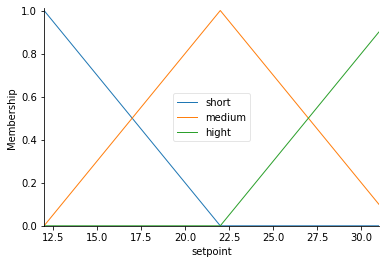

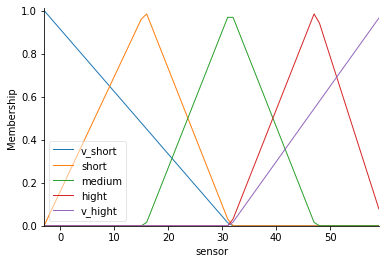

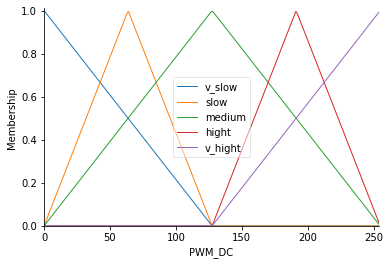

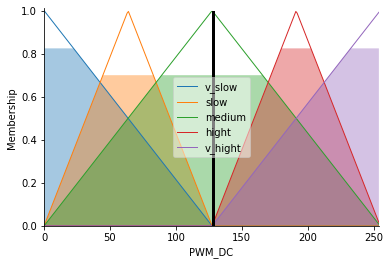

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Temprature
setpoint = ctrl.Antecedent(np.arange(12, 32, 1), 'setpoint')
sensor = ctrl.Antecedent(np.arange(-3, 60, 1), 'sensor')
PWM_DC = ctrl.Consequent(np.arange(0, 255 , 1), 'PWM_DC')

setpoint['short'] = fuzz.trimf(setpoint.universe, [12,12,22])
setpoint['medium'] = fuzz.trimf(setpoint.universe, [12,22,32])
setpoint['hight'] = fuzz.trimf(setpoint.universe, [22,32,32])
setpoint.view()

sensor['v_short'] = fuzz.trimf(sensor.universe, [-3, -3, 31.5])
sensor['short'] = fuzz.trimf(sensor.universe, [-3, 15.75, 31.5])
sensor['medium'] = fuzz.trimf(sensor.universe, [15.75, 31.5, 47.25])
sensor['hight'] = fuzz.trimf(sensor.universe, [31.5, 47.25, 60])
sensor['v_hight'] = fuzz.trimf(sensor.universe, [31.5, 60, 60])
sensor.view()

PWM_DC['v_slow'] = fuzz.trimf(PWM_DC.universe, [0, 0, 127.5])
PWM_DC['slow'] = fuzz.trimf(PWM_DC.universe, [0, 63.75, 127.5])
PWM_DC['medium'] = fuzz.trimf(PWM_DC.universe, [0, 127.5,255])
PWM_DC['hight'] = fuzz.trimf(PWM_DC.universe, [127.5, 191.25, 255])
PWM_DC['v_hight'] = fuzz.trimf(PWM_DC.universe, [127.5, 255, 255])
PWM_DC.view()

rule1 = ctrl.Rule(setpoint['short'] | sensor['v_short'], PWM_DC['v_slow'])
rule2 = ctrl.Rule(setpoint['short'] | sensor['short'], PWM_DC['slow'])
rule3 = ctrl.Rule(setpoint['short'] | sensor['medium'], PWM_DC['medium'])
rule4 = ctrl.Rule(setpoint['short'] | sensor['hight'], PWM_DC['hight'])
rule5 = ctrl.Rule(setpoint['short'] | sensor['v_hight'], PWM_DC['v_hight'])

rule6 = ctrl.Rule(setpoint['medium'] | sensor['v_short'], PWM_DC['slow'])
rule7 = ctrl.Rule(setpoint['medium'] | sensor['short'], PWM_DC['slow'])
rule8 = ctrl.Rule(setpoint['medium'] | sensor['medium'], PWM_DC['medium'])
rule9 = ctrl.Rule(setpoint['medium'] | sensor['hight'], PWM_DC['hight'])
rule10 = ctrl.Rule(setpoint['medium'] | sensor['v_hight'], PWM_DC['hight'])

rule11 = ctrl.Rule(setpoint['hight'] | sensor['v_short'], PWM_DC['v_hight'])
rule12 = ctrl.Rule(setpoint['hight'] | sensor['short'], PWM_DC['hight'])
rule13 = ctrl.Rule(setpoint['hight'] | sensor['medium'], PWM_DC['medium'])
rule14 = ctrl.Rule(setpoint['hight'] | sensor['hight'], PWM_DC['slow'])
rule15 = ctrl.Rule(setpoint['hight'] | sensor['v_hight'], PWM_DC['v_slow'])

PWM_DC_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
PWM_DC_ing= ctrl.ControlSystemSimulation(PWM_DC_ctrl)
PWM_DC_ing.input['setpoint'] = 15
PWM_DC_ing.input['sensor'] = 55
PWM_DC_ing.compute()
print(PWM_DC_ing.output['PWM_DC'])
PWM_DC.view(sim=PWM_DC_ing)